In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import random


In [2]:
DEVICE = 'cuda'

In [3]:
class SineDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, data_count, device='cpu'):
        self.freq = 10*torch.rand(size=(data_count, 1), device=DEVICE) + 1
        
        random_uniform_shift = 10*torch.rand(size=(data_count, 1), device=DEVICE)
        random_normal_shift = torch.normal(0, 1, size=(1, 1), device=DEVICE)
        
        self.points = torch.arange(0,6,1/40, device=DEVICE).repeat(data_count, 1)  + random_uniform_shift
        self.phase = torch.normal(0, 5, size=(data_count, 1), device=DEVICE)
        self.amplitude = (self.points[0] - random_uniform_shift[0])**2 
        # print(self.amplitude)
        self.data_matrix = torch.sin(self.points * self.freq + self.phase)
        self.data_matrix_without_noise = torch.sin(self.points * self.freq + self.phase)
        for i in range(data_count):
            if random.random() < 0.3:
                self.amplitude = torch.flip(self.amplitude, dims=(-1,))
                random_noise = (self.amplitude+1)*torch.normal(0, 1, size=(1, len(self.data_matrix[0])), device=DEVICE)
                self.data_matrix_without_noise[i] = self.amplitude*self.data_matrix[i]
                self.data_matrix[i] = self.amplitude*self.data_matrix[i] + random_noise
            elif 0.3<=random.random() <0.7:
                random_noise = (self.amplitude+1)*torch.normal(0, 1, size=(1, len(self.data_matrix[0])), device=DEVICE)
                self.data_matrix_without_noise[i] = self.amplitude*self.data_matrix[i]
                self.data_matrix[i] = self.amplitude*self.data_matrix[i] + random_noise               
            else:
                random_noise = torch.normal(0, 1, size=(1, len(self.data_matrix[0])), device=DEVICE)
                self.data_matrix_without_noise[i] = self.data_matrix[i]
                self.data_matrix[i] = self.data_matrix[i] + random_noise
    def __len__(self):
        return len(self.freq)

    def __getitem__(self, idx):
        return self.data_matrix[idx], self.freq[idx]

In [4]:
dataset = SineDataset(20, DEVICE)


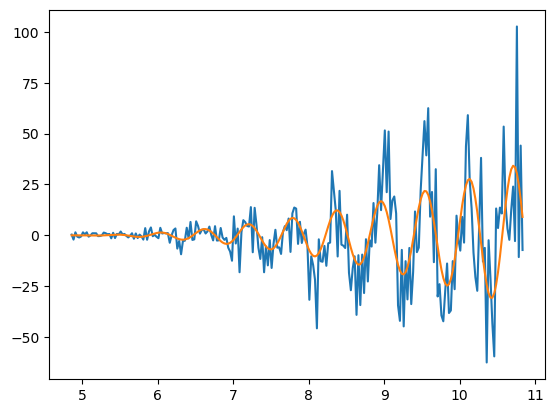

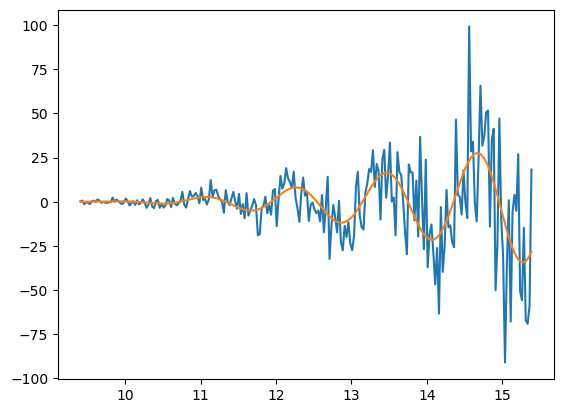

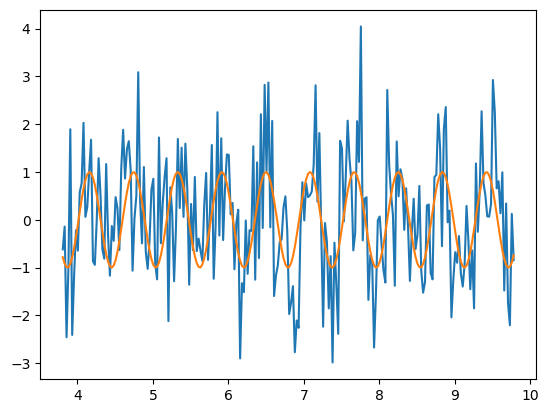

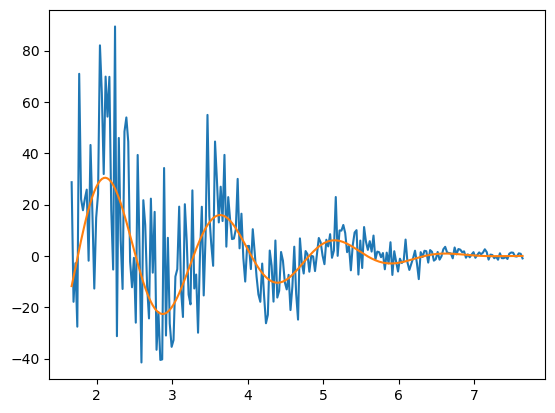

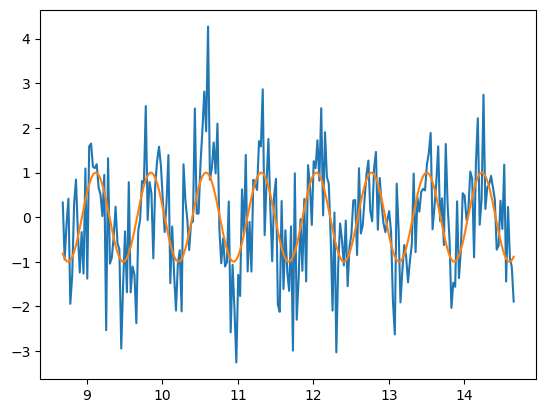

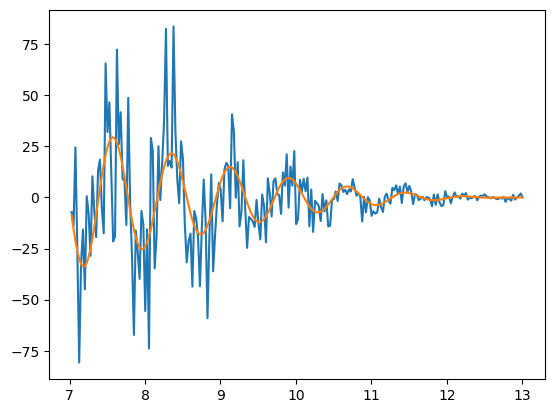

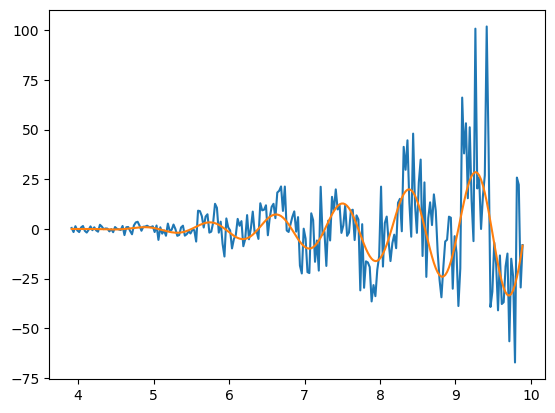

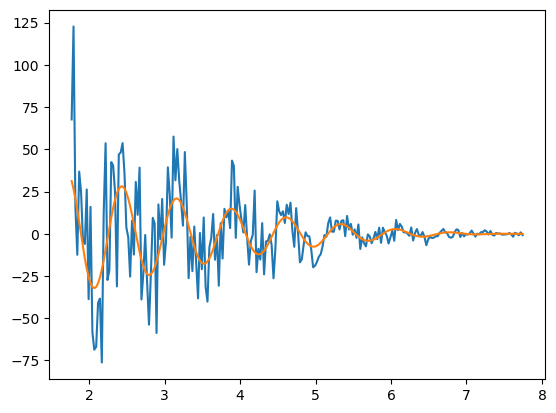

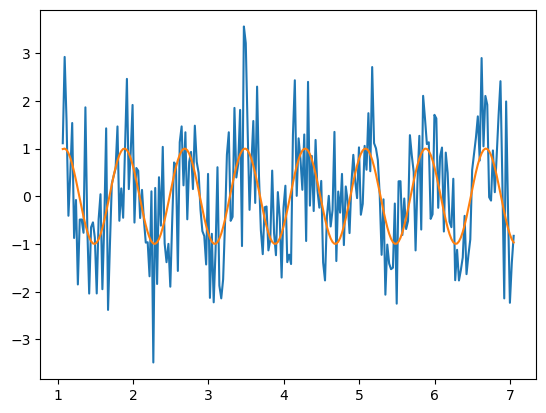

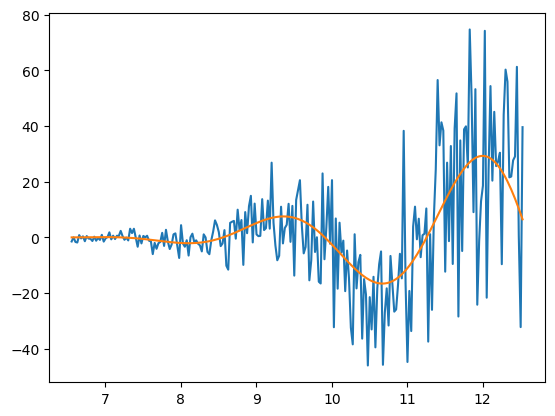

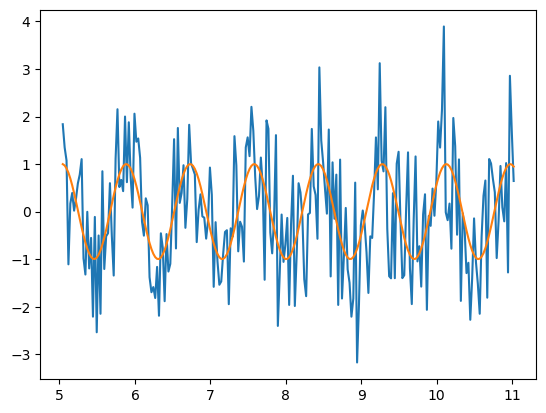

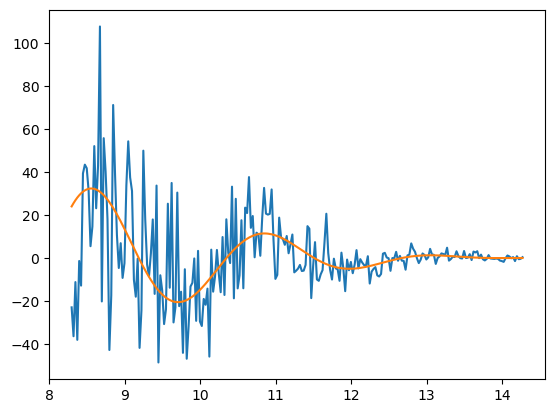

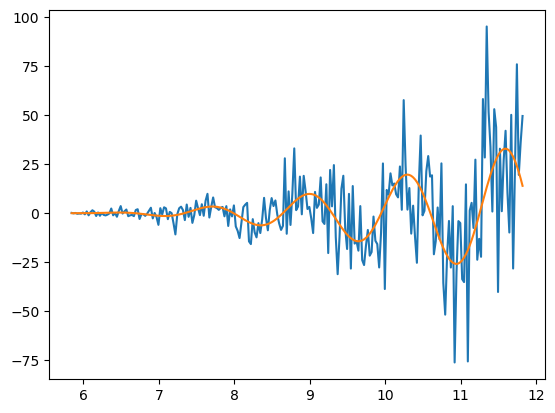

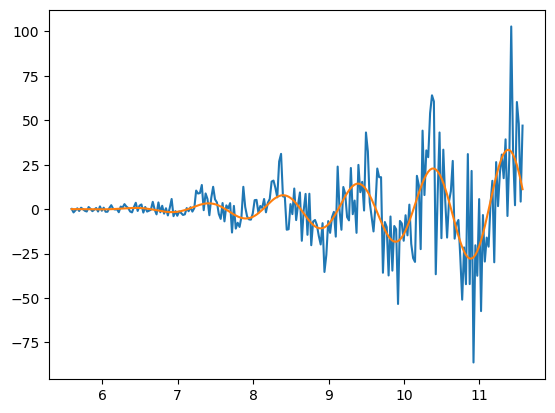

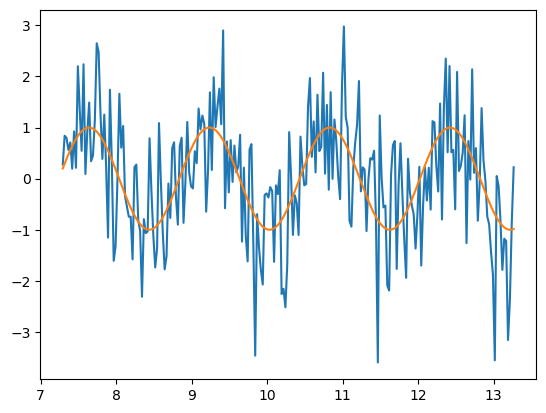

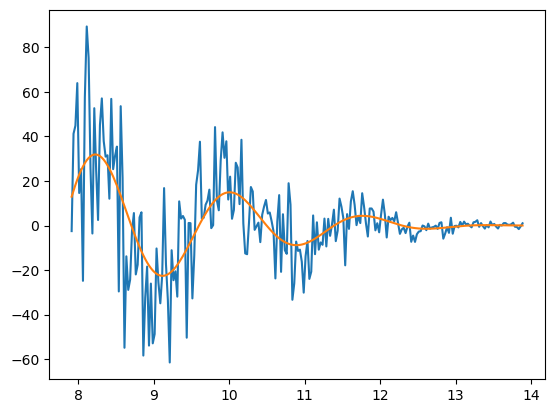

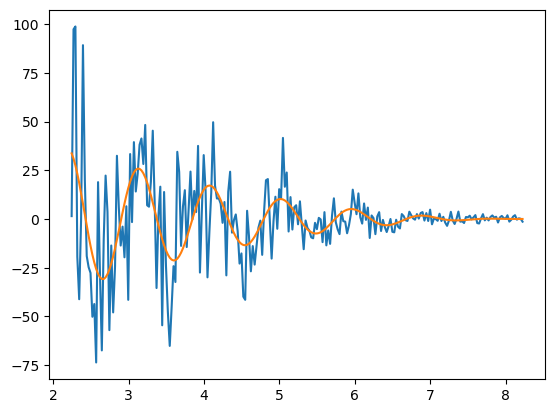

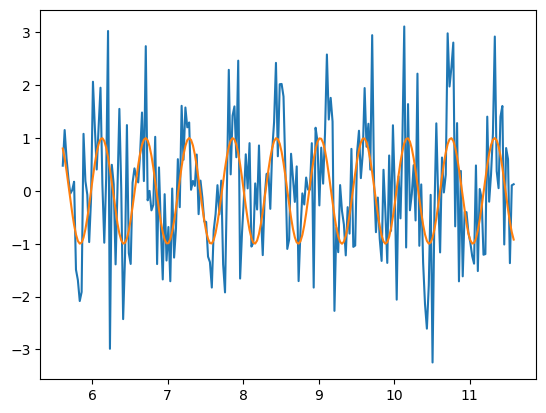

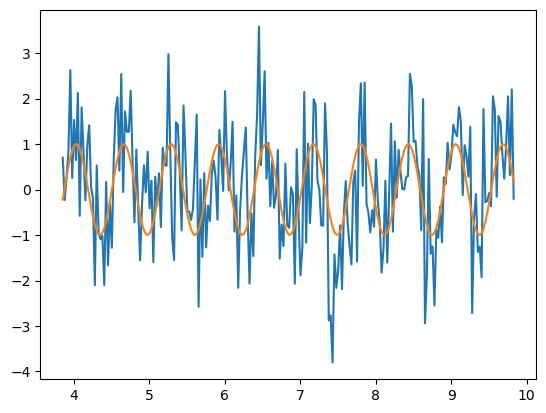

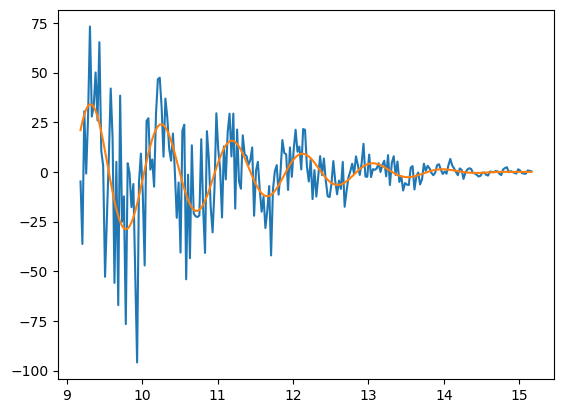

In [5]:
for i in range(20):
    plt.plot(dataset.points[i].cpu(), dataset.data_matrix[i].cpu())
    plt.plot(dataset.points[i].cpu(), dataset.data_matrix_without_noise[i].cpu())
    plt.show()    